In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"] #正常显示中文标签
plt.rcParams["axes.unicode_minus"]=False   #正常显示负号
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("./change.xlsx",sheet_name="红酒品质数据集")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,6.966508,0.275507,0.341619,6.380195,0.045549,35.568625,140.847358,0.994223,3.193302,0.488653,10.449133,5.878143
std,0.843557,0.100190,0.122804,5.108090,0.021845,16.975192,43.338922,0.002989,0.153419,0.114040,1.207762,0.910847
min,4.200000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.210000,0.270000,1.700000,0.036000,23.000000,110.000000,0.991905,3.090000,0.410000,9.400000,5.000000
50%,6.900000,0.260000,0.320000,5.200000,0.043000,34.000000,138.000000,0.993900,3.180000,0.470000,10.300000,6.000000
75%,7.400000,0.320000,0.400000,9.800000,0.050000,46.000000,170.000000,0.996300,3.290000,0.550000,11.300000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.000000,9.000000


In [5]:
from sklearn.preprocessing import scale
data_scaled = scale(data)
data_scaled

array([[ 0.03970784, -0.05496947,  0.14969839, ..., -0.33898642,
        -1.36561999,  0.13380179],
       [-0.79021804,  0.24450081, -0.01318349, ...,  0.01181177,
        -0.78596143,  0.13380179],
       [ 1.34387709,  0.04485396,  0.47546213, ..., -0.42668597,
        -0.28911124,  0.13380179],
       ...,
       [ 0.03970784, -0.25461631, -0.09462442, ..., -0.33898642,
         1.53267281,  0.13380179],
       [-0.31597468, -0.15479289, -0.42038817, ...,  0.62570859,
        -0.04068614,  0.13380179],
       [ 0.03970784, -0.35443974, -0.33894723, ...,  0.71340814,
        -0.04068614,  0.13380179]])

In [6]:
data_scaled = pd.DataFrame(data_scaled)


In [7]:
data_scaled.skew().sort_values(ascending=False)

4     5.106962
1     1.559105
2     1.307902
3     1.163091
7     1.146117
9     0.916552
5     0.824032
0     0.692792
10    0.536228
8     0.455908
6     0.280577
11    0.165114
dtype: float64

In [8]:
data_scaled.kurt().sort_values(ascending=False)

4     39.429623
7     12.299895
2      6.500650
1      4.815574
3      4.365614
0      2.340620
5      1.986114
9      1.232684
8      0.413130
11     0.160617
6      0.086974
10    -0.644660
dtype: float64

In [9]:
(data_scaled.max()-data_scaled.min()).sort_values(ascending=False)

7     17.349762
4     15.428730
2     13.519195
3     12.765703
0     11.856084
1      9.233667
5      8.513514
6      8.249994
9      7.366762
8      7.170827
11     6.588119
10     4.968502
dtype: float64

In [11]:
columns = ["非挥发性酸","挥发性酸","柠檬酸","剩余糖分","氯化物","游离二氧化硫","总二氧化硫",
            "密度","酸碱性","硫酸盐","酒精","质量"]

In [12]:
data_df_scaled = pd.DataFrame(data_scaled)
data_df_scaled.columns = columns
data_df_scaled.sample(4)  #随机抽取5个归一化后的样本数据

,非挥发性酸,挥发性酸,柠檬酸,剩余糖分,氯化物,游离二氧化硫,总二氧化硫,密度,酸碱性,硫酸盐,酒精,质量
149,-0.078853,-0.254616,-0.338947,-0.446446,0.386909,-0.740506,-0.573400,-0.074725,-1.325310,-0.952883,-0.868770,0.133802
1436,1.818120,2.839910,3.244454,2.245707,0.249561,0.909171,2.357367,2.100269,-1.325310,1.853502,-1.034387,-0.964218
1546,-0.315975,0.144677,1.208431,-0.328970,-0.528743,-0.033502,0.349676,0.092582,-0.412660,-0.338986,-0.454728,0.133802
3779,-0.553096,0.444148,0.882667,0.258409,-1.078134,-0.269170,-1.011861,-0.964800,0.043666,1.853502,1.863906,1.231822


In [13]:
corr_df = data_df_scaled.corr()
corr_df

,非挥发性酸,挥发性酸,柠檬酸,剩余糖分,氯化物,游离二氧化硫,总二氧化硫,密度,酸碱性,硫酸盐,酒精,质量
非挥发性酸,1.000000,0.001852,0.283526,0.078038,0.011019,-0.077129,0.055293,0.232542,-0.440843,-0.018208,-0.073556,-0.125994
挥发性酸,0.001852,1.000000,-0.130598,0.094917,0.077969,-0.091866,0.100011,0.067915,-0.068757,-0.049446,0.031748,-0.193837
柠檬酸,0.283526,-0.130598,1.000000,0.118168,0.107271,0.081765,0.105156,0.153867,-0.179736,0.054652,-0.065501,-0.022072
剩余糖分,0.078038,0.094917,0.118168,1.000000,0.091696,0.316906,0.415327,0.840133,-0.176952,-0.036007,-0.440183,-0.110106
氯化物,0.011019,0.077969,0.107271,0.091696,1.000000,0.105326,0.210686,0.263469,-0.068132,0.029289,-0.360915,-0.210434
游离二氧化硫,-0.077129,-0.091866,0.081765,0.316906,0.105326,1.000000,0.618634,0.302169,0.001218,0.051732,-0.258914,0.017685
总二氧化硫,0.055293,0.100011,0.105156,0.415327,0.210686,0.618634,1.000000,0.536789,0.000988,0.148053,-0.456757,-0.170557
密度,0.232542,0.067915,0.153867,0.840133,0.263469,0.302169,0.536789,1.000000,-0.066131,0.085976,-0.765232,-0.321771
酸碱性,-0.440843,-0.068757,-0.179736,-0.176952,-0.068132,0.001218,0.000988,-0.066131,1.000000,0.184499,0.087052,0.118126
硫酸盐,-0.018208,-0.049446,0.054652,-0.036007,0.029289,0.051732,0.148053,0.085976,0.184499,1.000000,-0.036600,0.058870


In [14]:
corr_df["质量"].sort_values(ascending=False)

质量        1.000000
酒精        0.454518
酸碱性       0.118126
硫酸盐       0.058870
游离二氧化硫    0.017685
柠檬酸      -0.022072
剩余糖分     -0.110106
非挥发性酸    -0.125994
总二氧化硫    -0.170557
挥发性酸     -0.193837
氯化物      -0.210434
密度       -0.321771
Name: 质量, dtype: float64

Text(0.5, 1, '各特征间的热力图')

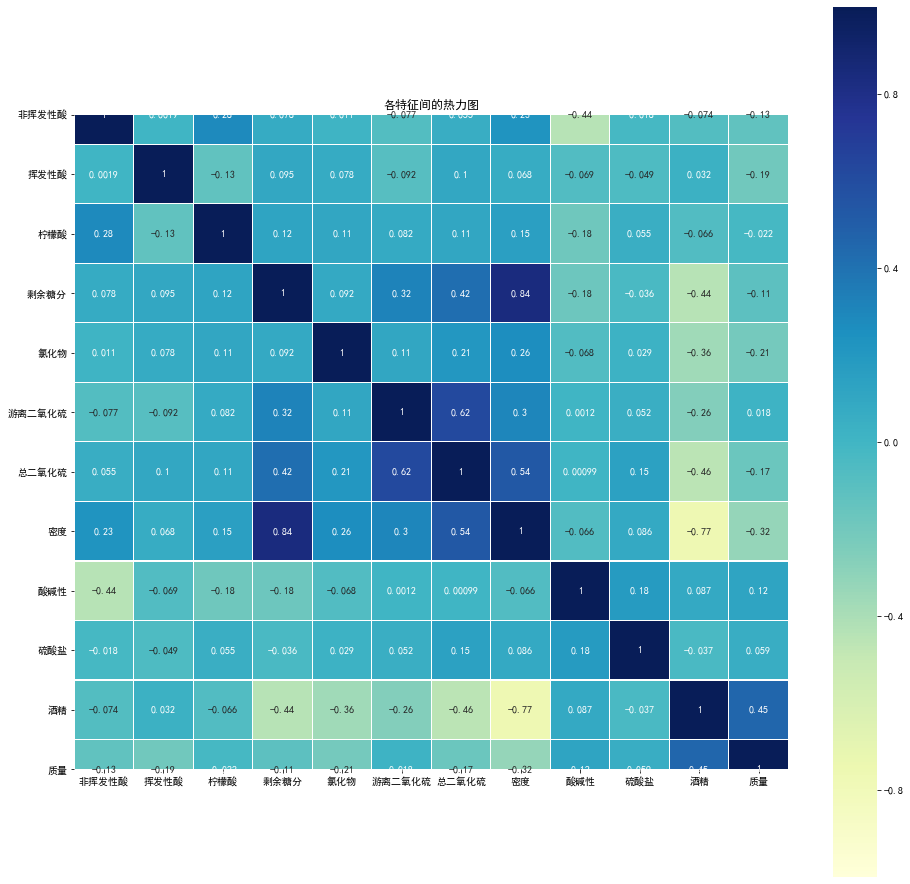

In [15]:
plt.figure(figsize=(16,16))
sns.heatmap(corr_df,linewidths=0.1,square=True,linecolor="white",annot=True,cmap='YlGnBu',vmin=-1,vmax=1)
plt.title("各特征间的热力图")

In [17]:
from sklearn.model_selection import train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split(data_df_scaled.iloc[:,:11], data_df_scaled.iloc[:,-1], test_size=0.3,random_state=100)

In [19]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [20]:
from sklearn.linear_model import RidgeCV
R1_CV = RidgeCV(cv=10).fit(xx_train, yy_train)
yyR1_pred = R1_CV.predict(xx_test)
print("均方误差：",mean_squared_error(yy_test, yyR1_pred))
Coef3_df = pd.DataFrame(R1_CV.coef_,index=columns[0:11],columns=["回归系数"])
Coef3_df.sort_values(by="回归系数",ascending=False)

均方误差： 0.7229851952062019


,回归系数
剩余糖分,0.502384
酒精,0.232232
酸碱性,0.143109
硫酸盐,0.106336
游离二氧化硫,0.084514
非挥发性酸,0.043827
柠檬酸,0.010301
氯化物,0.003461
总二氧化硫,-0.003451
挥发性酸,-0.194601


In [22]:
from sklearn.linear_model import LassoCV

In [24]:
x = data_df_scaled.iloc[:,:11]
y = data_df_scaled.iloc[:,-1]

In [25]:
from sklearn.linear_model import RidgeCV
R2_cv = RidgeCV(alphas=np.arange(0, 100), scoring='neg_mean_squared_error', cv=10).fit(x,y)
print("线性模型的截距：", R2_cv.intercept_)
print("线性模型的回归系数：\n", R2_cv.coef_)
print("最佳惩罚系数：", R2_cv.alpha_)

线性模型的截距： 7.247748792904416e-15
线性模型的回归系数：
 [ 0.00706199 -0.19124196 -0.00577559  0.34579038 -0.01074832  0.09248352
 -0.01692769 -0.3417261   0.09735743  0.08368981  0.3540054 ]
最佳惩罚系数： 48


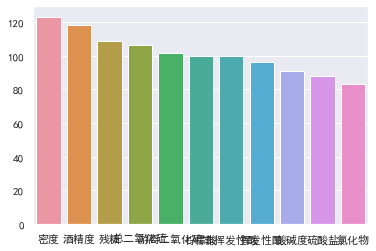

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
#sns.set_style('darkgrid',{'font.sans-seif':['SimHei','Arial']})


sns.set()
xx=['密度','酒精度','残糖','总二氧化硫','游离二氧化硫','柠檬酸','非挥发性酸','挥发性酸','酸碱度','硫酸盐','氯化物']
x = ['金融','农业','制造业','新能源']
y = [164, 86, 126, 58]
yy=[123.3,118.3,108.6,106.5,101.8,99.9,99.8,96.5,91.2,88,83]
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
sns.barplot(xx,yy)

plt.show()

In [20]:
from pyecharts import Bar

bar = Bar("松鼠学堂课程销量统计","付费课程学员数量统计")
bar.add("学员人数",xx,yy)
bar.render()
bar


In [26]:
from pyecharts import Bar,Style

style = Style(
    title_pos = "center",
    width=980,
    height=600,
    background_color="#fff"
)

style_bar = style.add(
    legend_top="bottom",        # 图例位置
    yaxis_label_textsize=9,     # y轴标签文字大小
    yaxis_rotate=45,            # y轴标签选择角度
    is_label_show = True,       # 展示柱形图上面的数值标签
    label_pos="right",          # 柱形图上面的数值标签显示位置
    label_text_size=12,         # 数值标签文本大小
    label_color=['orange']     # 柱形图颜色
)

bar = Bar("松鼠学堂课程销量统计","付费课程学员数量统计",**style.init_style)
bar.add("学员人数",xx,yy,**style_bar)
bar.render()
bar